# <span style="color:#00bfff;">Gradiente descendiente en el _Machine Learning_</span>

El **gradiente descendiente** es un método de optimización que básicamente consiste en _“bajar la colina”_ de una función hasta encontrar su punto más bajo, que representa la mejor solución posible. 

En **inteligencia artificial y machine learning** se usa para entrenar modelos ajustando sus parámetros _(pesos)_ de forma iterativa: se calcula la pendiente de la función de error y se actualizan los valores en la dirección contraria al gradiente, con pasos controlados por la tasa de aprendizaje. 

En pocas palabras, es el **GPS matemático** que guía al modelo desde el caos inicial hacia un conjunto de parámetros que minimizan los errores y permiten hacer predicciones más precisas.

## <span style="color:#00bfff;">1.</span> Importación de librerías

In [2]:
# Importar librerías
import numpy as np
import matplotlib.pyplot as plt

## <span style="color:#00bfff;">2.</span> Definición de la función de costo

In [3]:
# Definir la función de costo J(theta) = theta^2 + 3theta + 2
def costo(theta):
    return theta**2 + 3 * theta + 2

## <span style="color:#00bfff;">3.</span> Definición de la derivada (gradiente)

In [4]:
# Definir la derivada de la función de costo (gradiente) 
# dJ/d(theta) = 2 * theta + 3 
def gradiente(theta):
    return 2 * theta + 3

## <span style="color:#00bfff;">4.</span> Párametros y ejecución del descenso del gradiente

In [6]:
# Parámetros del descenso del gradiente
alpha = 0.1  # Tasa de aprendizaje
theta = 5  # Valor inicial
num_iter = 20  # Número de iteraciones

# Almacenar valores para visualizar el descenso
historial_theta = [theta]
historial_costo = [costo(theta)]

# Aplicar Descenso del Gradiente
for i in range(num_iter):
    theta = theta - alpha * gradiente(theta)  # Actualizar el parámetro
    historial_theta.append(theta)
    historial_costo.append(costo(theta))

## <span style="color:#00bfff;">5.</span> Graficar Gradiente Descendiente

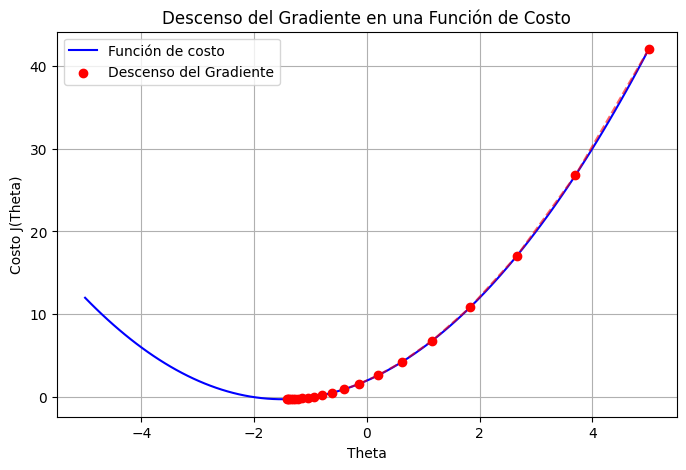

In [7]:
# Graficar la función de costo y el descenso del gradiente
theta_vals = np.linspace(-5, 5, 100)
costo_vals = costo(theta_vals)

plt.figure(figsize=(8, 5))
plt.plot(theta_vals, costo_vals, label="Función de costo", color="blue")
plt.scatter(
    historial_theta,
    historial_costo,
    color="red",
    label="Descenso del Gradiente",
    zorder=3,
)

plt.plot(
    historial_theta, historial_costo, color="red", linestyle="dashed", alpha=0.6
)  # Línea del descenso
plt.xlabel("Theta")
plt.ylabel("Costo J(Theta)")
plt.title("Descenso del Gradiente en una Función de Costo")
plt.legend()
plt.grid(True)
plt.show()

## <span style="color:#00bfff;">6.</span> Mínimos Locales y Globales

Un **mínimo local** es como caer en un valle pequeño dentro de una montaña: desde ese punto todo alrededor parece más alto, pero no necesariamente es el punto más bajo de todo el terreno. 

El **mínimo global**, en cambio, es el valle más profundo de todo el paisaje, el lugar donde realmente termina la bajada. 

En **machine learning**, el gradiente descendiente puede quedarse atrapado en _mínimos locales_, lo que significa que el modelo encuentra una solución _“aceptable”_ pero no necesariamente la mejor.

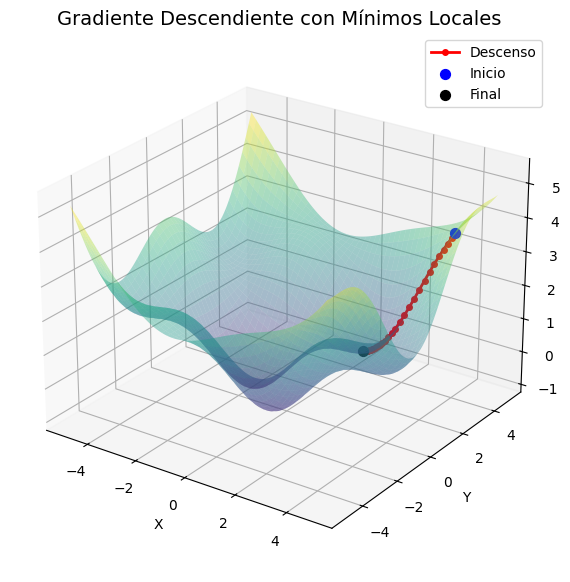

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos la función con múltiples mínimos locales
def f(x, y):
    return np.sin(x) * np.cos(y) + 0.1*(x**2 + y**2)

# Gradiente de la función
def grad_f(x, y):
    df_dx = np.cos(x) * np.cos(y) + 0.2 * x
    df_dy = -np.sin(x) * np.sin(y) + 0.2 * y
    return np.array([df_dx, df_dy])

# Simulación de gradiente descendiente
def gradient_descent(start, lr=0.05, steps=50):
    path = [start]
    point = np.array(start, dtype=float)
    for _ in range(steps):
        grad = grad_f(point[0], point[1])
        point = point - lr * grad
        path.append(point.copy())
    return np.array(path)

# Crear la malla para graficar la superficie
x = np.linspace(-5, 5, 200)
y = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Ejecutar gradiente descendiente desde un punto inicial
start = [4, 4]
path = gradient_descent(start, lr=0.1, steps=40)

# Graficar en 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap="viridis", alpha=0.4)
ax.view_init(elev=25, azim=305)  

# Trayectoria del gradiente descendiente
ax.plot(path[:,0], path[:,1], f(path[:,0], path[:,1]), 
        color="red", marker="o", markersize=4, linewidth=2, label="Descenso")

# Punto inicial y final
ax.scatter(start[0], start[1], f(start[0], start[1]), color="blue", s=50, label="Inicio")
ax.scatter(path[-1,0], path[-1,1], f(path[-1,0], path[-1,1]), color="black", s=50, label="Final")

ax.set_title("Gradiente Descendiente con Mínimos Locales", fontsize=14)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("f(x,y)")
ax.legend()
plt.show()